<a href="https://colab.research.google.com/github/MilixUK/AssemblerExample/blob/master/Stacked_plot_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import required packages and mount the google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [2]:
# 2. Read a file and return a dataframe
def df_from_file(filename):
  # Create a path from a filename
  path = '/content/drive/MyDrive/CSI DATA/' + filename + '.CSV'
  csi_frame_lines = []
  csi_data = []
  df = pd.read_csv(path) # Read data from the file

  for value in df['CSI_DATA']:
    # Edit each row
    line = value.replace("[", "").replace("]", "")
    line_array = line.split()  # or line.split(',')
    # Append the resulting array to csi_data
    csi_data.append(line_array)
    df_2 = dz = pd.DataFrame(csi_data)
    df_2.fillna(0)#remove nulls


  # Return CSI data
  return df_2



In [3]:
#3. Transform csi and return as arrays of amplitudes and phases for a given subcarier

# Use this function to find and index of columns representing imaginary and real values for a given carrier
def find_indexes(carrier):
  carrier_int = int(carrier)
  index_a = (carrier *2) -1
  index_b = index_a -1
  return index_a, index_b

# Use this function to turn a column from a dataframe into an array
def column_to_array(df, column_index):
    # Get the column values
    column_values = df.iloc[:, column_index]

    # Convert the column values to a flat list
    values_list = column_values.values.flatten().tolist()

    return values_list
# Use this funtion to return arrays with amplitudes
def calculate_amplitudes(arr_img, arr_real):
  amplitudes = []
  iterator = range(len(arr_img)- 1)
  for i in iterator:
    amplitude_calc = math.sqrt(arr_img[i] ** 2 + arr_real[i] ** 2)
    amplitudes.append(amplitude_calc)
  return amplitudes
# Use this funtion to return arrays with phases
def calculate_phases(arr_img, arr_real):
  phases = []
  iterator = range(len(arr_img)- 1)
  for i in iterator:
    phase_calc = math.atan2(arr_img[i], arr_real[i] )
    phases.append(phase_calc)
  return phases


# Use this funtion to transform CSI dataframe into arrays of amplitudes and phases
def transform_csi(subcarier, df):
  index_real, index_imaginary = find_indexes(subcarier) # Get indexes for imaginary values
  perm_amp = collections.deque(maxlen=1000)
  perm_phase = collections.deque(maxlen=1000)
  num_rows = len(df)
  amplitudes = []
  phases = []
  imaginary_values = []
  real_values = []
  imaginary_values = column_to_array(df,index_imaginary )
  imaginary_values_clr = [x if x is not None else 0 for x in imaginary_values]
  imaginary_values_clr_int = [int(x) for x in imaginary_values_clr]
  real_values = column_to_array(df,index_real )
  real_values_clr = [x if x is not None else 0 for x in real_values]
  real_values_clr_int = [int(x) for x in real_values_clr]
  amplitudes = calculate_amplitudes(imaginary_values_clr_int, real_values_clr_int)
  phases= calculate_phases(imaginary_values_clr_int, real_values_clr_int)
  return amplitudes, phases



In [4]:
def carrier_plot(amp, phs, title):
    plt.scatter(phs, amp)
    plt.xlabel('Phase')
    plt.ylabel('Amplitude')
    plt.title(title)


def plot_heatmap(data, title):
    plt.figure(figsize=(8, 6))
    plt.imshow([data], cmap='viridis', aspect='auto', extent=[0, len(data), min(data), max(data)])
    plt.colorbar(label='Frequency')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()


In [5]:


# Modify the display function to create subplots
def display_comparison_charts():
    # Get user input: participants numbers to compare and a subcarrier no
    subcarrier_no = int(input("Enter subcarrier no: "))
    participant_1 = input("Enter participant no 1: ")
    participant_2 = input("Enter participant no 2: ")
    location_no = input("Enter the location number: ")

     # Read data for participant 1
    filename_1 = participant_1 + "_" + location_no
    df_1 = df_from_file(filename_1)
    amp_1, phs_1 = transform_csi(subcarrier_no, df_1)

    # Read data for participant 2
    filename_2 = participant_2 + "_" + location_no
    df_2 = df_from_file(filename_2)
    amp_2, phs_2 = transform_csi(subcarrier_no, df_2)

    # Create subplots
    plt.figure(figsize=(10, 5))

    # First subplot for participant 1
    plt.subplot(1, 2, 1)
    carrier_plot(amp_1, phs_1, f'{participant_1} - Location {location_no}')
    #plot_heatmap(amp_1, 'Amplitude Distribution')
    # Second subplot for participant 2
    plt.subplot(1, 2, 2)
    carrier_plot(amp_2, phs_2, f'{participant_2} - Location {location_no}')
    #plot_heatmap(phs_1, 'Phase Distribution')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


Enter subcarrier no: 44
Enter participant no 1: 001
Enter participant no 2: 002
Enter the location number: 5


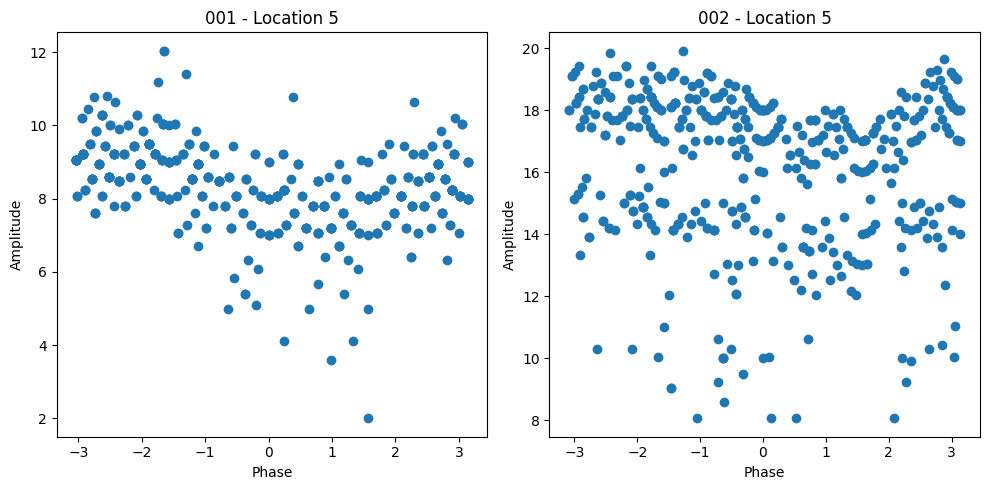

In [6]:
display_comparison_charts()

In [7]:
def display_4_charts_single_loc():
    # Get user input: subcarrier number, participants numbers, and location number
    subcarrier_no = int(input("Enter subcarrier no: "))
    participant_1 = input("Enter participant no 1: ")
    participant_2 = input("Enter participant no 2: ")
    participant_3 = input("Enter participant no 3: ")
    participant_4 = input("Enter participant no 4: ")
    location_no = input("Enter the location number: ")

    # Read data for participant 1
    filename_1 = participant_1 + "_" + location_no
    df_1 = df_from_file(filename_1)
    amp_1, phs_1 = transform_csi(subcarrier_no, df_1)

    # Read data for participant 2
    filename_2 = participant_2 + "_" + location_no
    df_2 = df_from_file(filename_2)
    amp_2, phs_2 = transform_csi(subcarrier_no, df_2)

    # Read data for participant 3
    filename_3 = participant_3 + "_" + location_no
    df_3 = df_from_file(filename_3)
    amp_3, phs_3 = transform_csi(subcarrier_no, df_3)

    # Read data for participant 4
    filename_4 = participant_4 + "_" + location_no
    df_4 = df_from_file(filename_4)
    amp_4, phs_4 = transform_csi(subcarrier_no, df_4)

    # Create subplots
    plt.figure(figsize=(20, 10))

    # First subplot for participant 1
    plt.subplot(2, 2, 1)
    carrier_plot(amp_1, phs_1, f'{participant_1} - Location {location_no}')

    # Second subplot for participant 2
    plt.subplot(2, 2, 2)
    carrier_plot(amp_2, phs_2, f'{participant_2} - Location {location_no}')

    # Third subplot for participant 3
    plt.subplot(2, 2, 3)
    carrier_plot(amp_3, phs_3, f'{participant_3} - Location {location_no}')

    # Fourth subplot for participant 4
    plt.subplot(2, 2, 4)
    carrier_plot(amp_4, phs_4, f'{participant_4} - Location {location_no}')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


Enter subcarrier no: 30
Enter participant no 1: 001
Enter participant no 2: 002
Enter participant no 3: 003
Enter participant no 4: EmptyCar
Enter the location number: 6


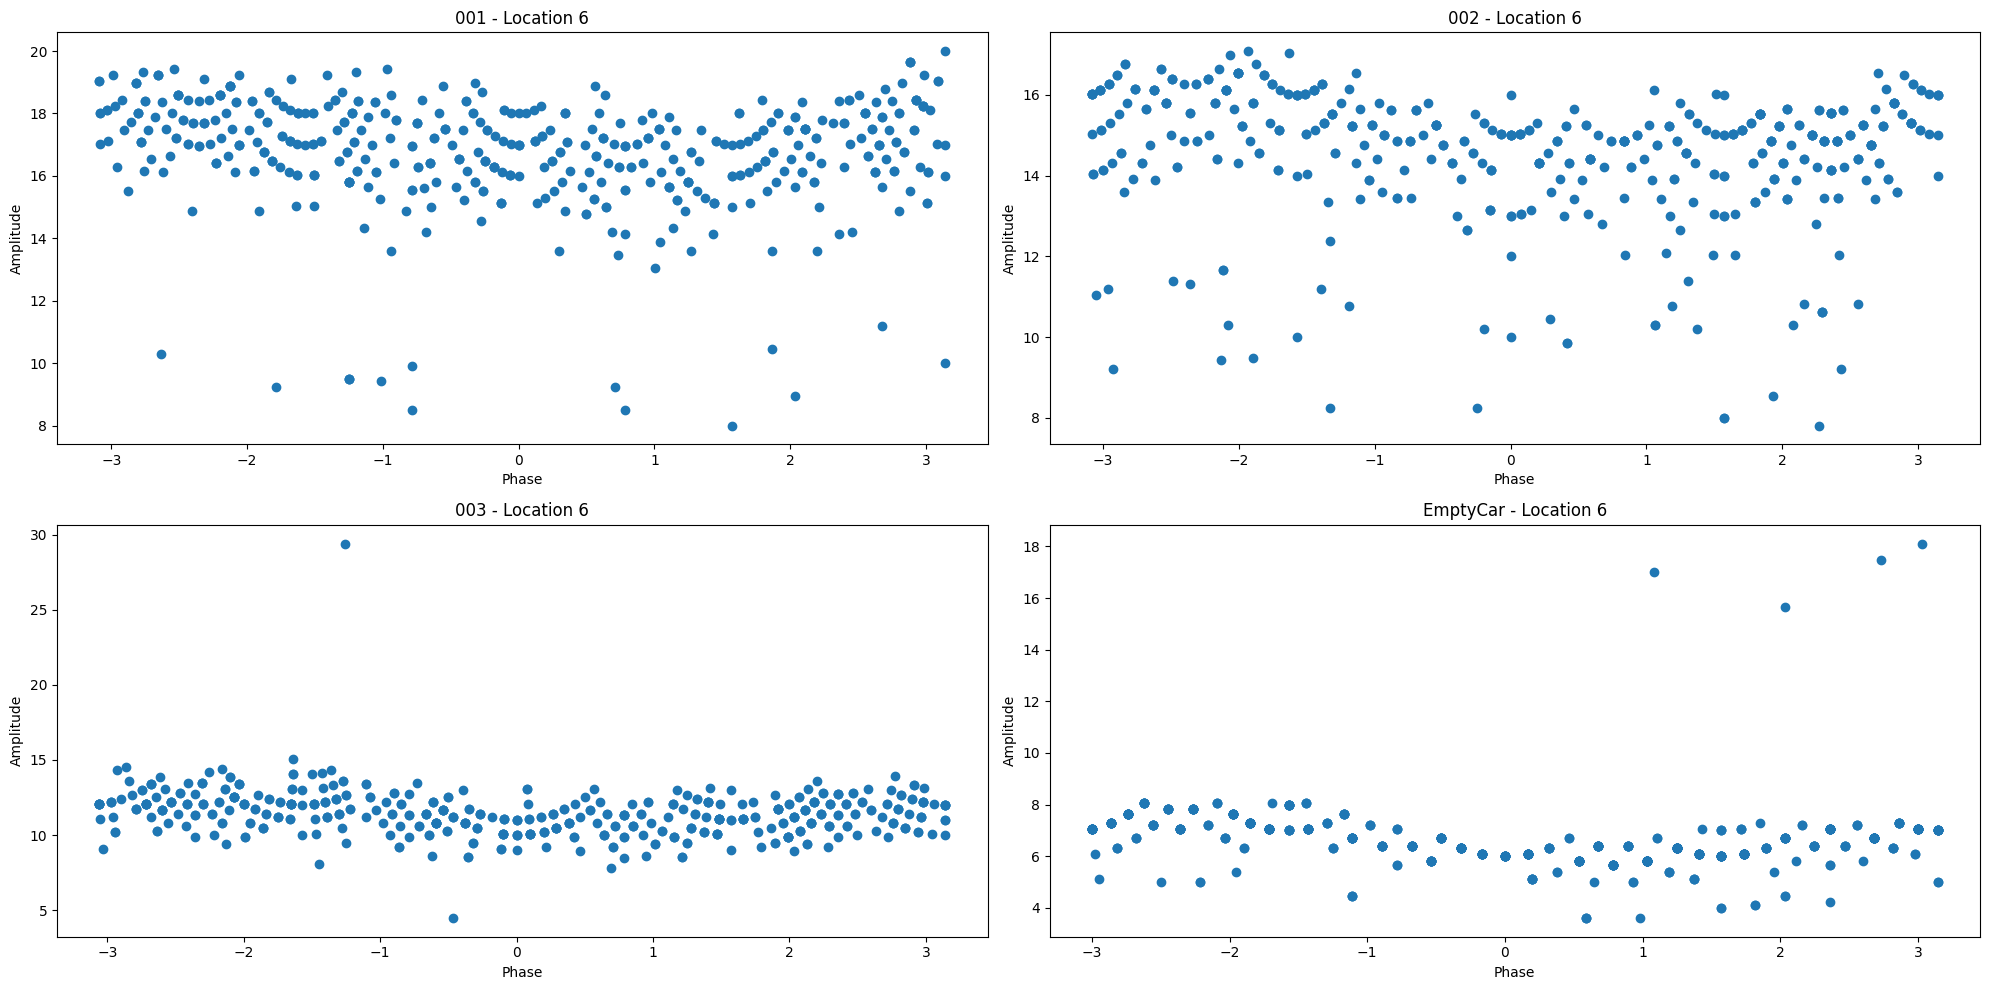

In [8]:
display_4_charts_single_loc()


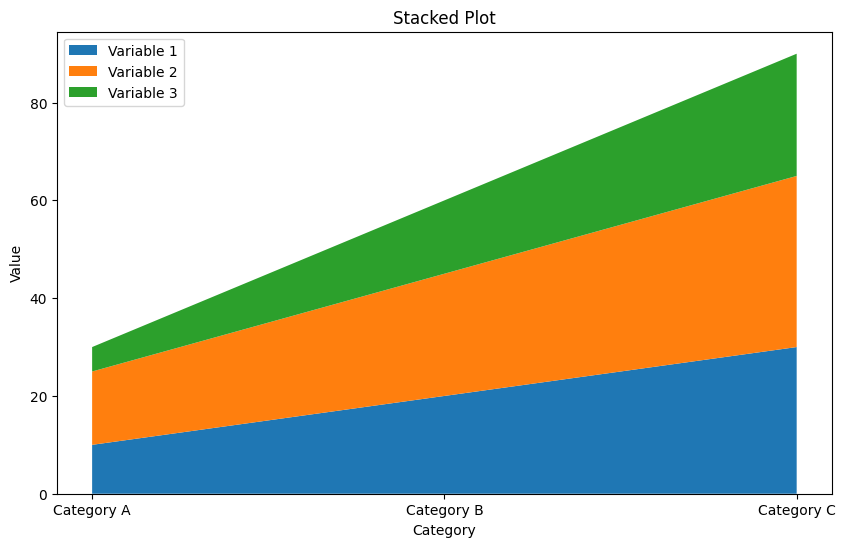

In [9]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C']
values_1 = [10, 20, 30]  # Values for first variable
values_2 = [15, 25, 35]  # Values for second variable
values_3 = [5, 15, 25]   # Values for third variable

# Create stacked plot
plt.figure(figsize=(10, 6))

plt.stackplot(categories, values_1, values_2, values_3, labels=['Variable 1', 'Variable 2', 'Variable 3'])

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Plot')
plt.legend(loc='upper left')
plt.show()

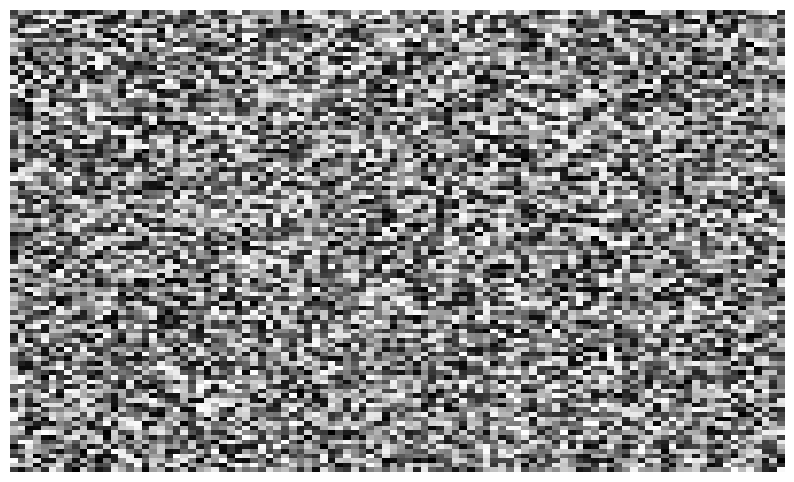

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random 2D array (you can replace this with your own data)
data = np.random.rand(100, 100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='gray', aspect='auto')

# Add gridlines
plt.grid(color='white', linestyle='-', linewidth=0.5)

# Remove axes
plt.axis('off')

# Show the plot
plt.show()


In [10]:
def amp_plot(amp):
    plt.plot(range(100 - len(amp), 100), df[:, subcarrier], color='r')
    plt.ylim(0, 60)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.xlim(0, 100)
    plt.title(f"Amplitude plot of Subcarrier {subcarrier}")
    fig.canvas.flush_events()
    plt.show()